In [1]:
import os
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torchvision
import math
from torch import nn
import matplotlib.ticker as mticker

# Part 4 Deep learning 

seed=1

In [17]:
num=1
seed=1
momentum=0
num_epochs=150
learning_rate=0.1

In [2]:
def compare(x,y):# function to calculate how many misclasification case
    false_num=0
    for i in range(len(x)):
        if x.data[i]!=y.data[i]:
            false_num=false_num+1
    return false_num

In [3]:
class AverageMeter(object):#find out mean loss.
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [4]:
class DNN(nn.Module):
    def __init__(self, input_channels=784,channels=100,output_channels=10):
        super(DNN, self).__init__()
        self.net=nn.Sequential(
            nn.Linear(input_channels,channels),
            nn.Linear(channels,output_channels)
        )

    def forward(self, x):
        x = self.net(x)
        return x


In [5]:
train_data = torchvision.datasets.MNIST(root='./mnist/', train=True,download=True)
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False,download=True)
# change the features to numpy
X_train = train_data.train_data.numpy()
X_test = test_data.test_data.numpy()
# change the labels to numpy
Y_train = train_data.train_labels.numpy()
Y_test = test_data.test_labels.numpy()
X_train_normalized = (X_train / 255)
X_test_normalized = (X_test / 255)
train_images_list = torch.tensor(X_train_normalized)
train_labels_list = torch.tensor(Y_train)
test_images_list = torch.tensor(X_test_normalized)
test_labels_list = torch.tensor(Y_test)
train_set = TensorDataset(train_images_list, train_labels_list)
test_set = TensorDataset(test_images_list, test_labels_list)
traindata = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
valdata = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

/Users/jiyixin/miniforge3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/jiyixin/miniforge3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/jiyixin/miniforge3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/jiyixin/miniforge3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [25]:

net = DNN()
torch.manual_seed(seed) 
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss().cuda()
t_l_list = []#record train loss
v_l_list = []#record val loss
t_r_list = []#record train misclassification
v_r_list = []#record test misclassification
epoch_list = []
min_error=10#try to find min loss error 
min_epoch=0#try to find epoch with min loss error

epoch1:train_setÔºöerror=0.4406,mis=11.87,test_setÔºöerror=0.2988,mis=8.459999999999999
epoch2:train_setÔºöerror=0.3074,mis=8.690000000000001,test_setÔºöerror=0.2892,mis=8.33
epoch3:train_setÔºöerror=0.2929,mis=8.18,test_setÔºöerror=0.2819,mis=7.969999999999999
epoch4:train_setÔºöerror=0.2851,mis=8.08,test_setÔºöerror=0.2759,mis=7.739999999999999
epoch5:train_setÔºöerror=0.281,mis=7.920000000000001,test_setÔºöerror=0.2807,mis=7.89
epoch6:train_setÔºöerror=0.2767,mis=7.71,test_setÔºöerror=0.2779,mis=7.95
epoch7:train_setÔºöerror=0.2727,mis=7.62,test_setÔºöerror=0.2768,mis=7.9
epoch8:train_setÔºöerror=0.271,mis=7.48,test_setÔºöerror=0.2716,mis=7.5600000000000005
epoch9:train_setÔºöerror=0.2692,mis=7.4399999999999995,test_setÔºöerror=0.2778,mis=7.829999999999999
epoch10:train_setÔºöerror=0.2676,mis=7.5,test_setÔºöerror=0.2809,mis=7.68
epoch11:train_setÔºöerror=0.266,mis=7.41,test_setÔºöerror=0.2799,mis=7.64
epoch12:train_setÔºöerror=0.2639,mis=7.35,test_setÔºöerror=0.2758,mis=7.79
epoch13

epoch104:train_setÔºöerror=0.2384,mis=6.64,test_setÔºöerror=0.2851,mis=7.5600000000000005
epoch105:train_setÔºöerror=0.2387,mis=6.65,test_setÔºöerror=0.2903,mis=7.95
epoch106:train_setÔºöerror=0.2381,mis=6.7,test_setÔºöerror=0.296,mis=8.03
epoch107:train_setÔºöerror=0.2379,mis=6.63,test_setÔºöerror=0.2902,mis=7.9
epoch108:train_setÔºöerror=0.2385,mis=6.660000000000001,test_setÔºöerror=0.2778,mis=7.51
epoch109:train_setÔºöerror=0.2373,mis=6.660000000000001,test_setÔºöerror=0.2868,mis=7.89
epoch110:train_setÔºöerror=0.238,mis=6.64,test_setÔºöerror=0.297,mis=7.99
epoch111:train_setÔºöerror=0.2378,mis=6.619999999999999,test_setÔºöerror=0.2889,mis=7.7299999999999995
epoch112:train_setÔºöerror=0.2383,mis=6.59,test_setÔºöerror=0.2902,mis=7.88
epoch113:train_setÔºöerror=0.2376,mis=6.619999999999999,test_setÔºöerror=0.3006,mis=8.15
epoch114:train_setÔºöerror=0.2373,mis=6.6000000000000005,test_setÔºöerror=0.2949,mis=8.15
epoch115:train_setÔºöerror=0.2377,mis=6.710000000000001,test_setÔºöerror=0.

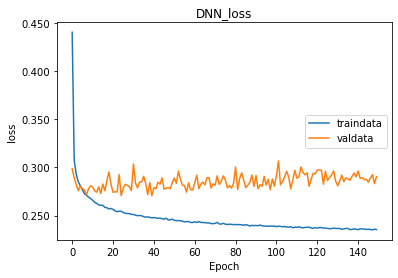

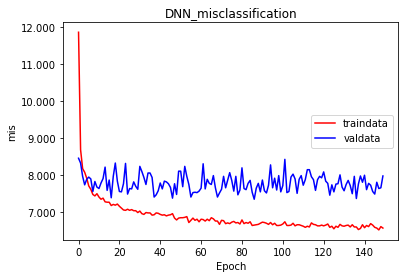

In [23]:
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('DNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('DNN_misclassification')
plt.plot(epoch_list, t_r_list, label="traindata", color='red')
plt.plot(epoch_list, v_r_list, label='valdata', color='blue')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

seed=2

epoch1:train_setÔºöerror=0.44,mis=11.799999999999999,test_setÔºöerror=0.3096,mis=8.7
epoch2:train_setÔºöerror=0.3072,mis=8.72,test_setÔºöerror=0.2908,mis=8.1
epoch3:train_setÔºöerror=0.2925,mis=8.19,test_setÔºöerror=0.284,mis=8.04
epoch4:train_setÔºöerror=0.2854,mis=8.04,test_setÔºöerror=0.2873,mis=7.89
epoch5:train_setÔºöerror=0.2796,mis=7.8100000000000005,test_setÔºöerror=0.2923,mis=8.12
epoch6:train_setÔºöerror=0.2759,mis=7.779999999999999,test_setÔºöerror=0.2785,mis=7.720000000000001
epoch7:train_setÔºöerror=0.2729,mis=7.6499999999999995,test_setÔºöerror=0.2865,mis=8.25
epoch8:train_setÔºöerror=0.2715,mis=7.59,test_setÔºöerror=0.2847,mis=8.09
epoch9:train_setÔºöerror=0.2693,mis=7.48,test_setÔºöerror=0.2744,mis=7.79
epoch10:train_setÔºöerror=0.2669,mis=7.489999999999999,test_setÔºöerror=0.2756,mis=7.89
epoch11:train_setÔºöerror=0.2649,mis=7.3999999999999995,test_setÔºöerror=0.2818,mis=8.02
epoch12:train_setÔºöerror=0.2642,mis=7.359999999999999,test_setÔºöerror=0.2774,mis=7.470000000

epoch106:train_setÔºöerror=0.2387,mis=6.660000000000001,test_setÔºöerror=0.2901,mis=7.739999999999999
epoch107:train_setÔºöerror=0.2386,mis=6.5600000000000005,test_setÔºöerror=0.28,mis=7.64
epoch108:train_setÔºöerror=0.2382,mis=6.68,test_setÔºöerror=0.2891,mis=8.17
epoch109:train_setÔºöerror=0.2377,mis=6.64,test_setÔºöerror=0.2869,mis=7.779999999999999
epoch110:train_setÔºöerror=0.2382,mis=6.65,test_setÔºöerror=0.2907,mis=7.79
epoch111:train_setÔºöerror=0.2381,mis=6.619999999999999,test_setÔºöerror=0.2861,mis=7.8100000000000005
epoch112:train_setÔºöerror=0.238,mis=6.710000000000001,test_setÔºöerror=0.2895,mis=8.129999999999999
epoch113:train_setÔºöerror=0.2378,mis=6.550000000000001,test_setÔºöerror=0.2926,mis=8.02
epoch114:train_setÔºöerror=0.2376,mis=6.660000000000001,test_setÔºöerror=0.2833,mis=7.630000000000001
epoch115:train_setÔºöerror=0.237,mis=6.63,test_setÔºöerror=0.2866,mis=7.48
epoch116:train_setÔºöerror=0.2376,mis=6.65,test_setÔºöerror=0.2826,mis=7.539999999999999
epoch117:t

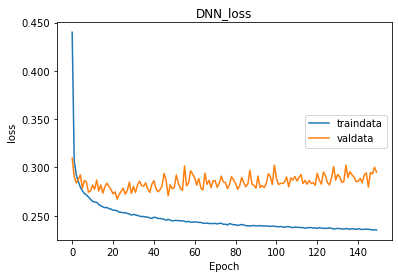

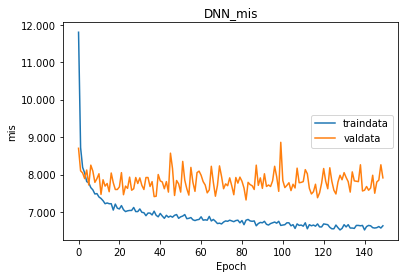

In [26]:

seed=2
momentum=0
num_epochs=150
learning_rate=0.1


net = DNN()
torch.manual_seed(seed)  
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('DNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('DNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

seed=3

epoch1:train_setÔºöerror=0.4391,mis=11.77,test_setÔºöerror=0.2984,mis=8.37
epoch2:train_setÔºöerror=0.3066,mis=8.72,test_setÔºöerror=0.2937,mis=8.309999999999999
epoch3:train_setÔºöerror=0.292,mis=8.14,test_setÔºöerror=0.2832,mis=8.01
epoch4:train_setÔºöerror=0.2852,mis=8.08,test_setÔºöerror=0.2805,mis=7.71
epoch5:train_setÔºöerror=0.2803,mis=7.84,test_setÔºöerror=0.2764,mis=7.9399999999999995
epoch6:train_setÔºöerror=0.2764,mis=7.739999999999999,test_setÔºöerror=0.2772,mis=7.66
epoch7:train_setÔºöerror=0.2728,mis=7.630000000000001,test_setÔºöerror=0.275,mis=7.7700000000000005
epoch8:train_setÔºöerror=0.2714,mis=7.5600000000000005,test_setÔºöerror=0.2799,mis=8.02
epoch9:train_setÔºöerror=0.2681,mis=7.5,test_setÔºöerror=0.2743,mis=7.89
epoch10:train_setÔºöerror=0.2675,mis=7.470000000000001,test_setÔºöerror=0.271,mis=7.48
epoch11:train_setÔºöerror=0.2652,mis=7.37,test_setÔºöerror=0.2722,mis=7.71
epoch12:train_setÔºöerror=0.2645,mis=7.380000000000001,test_setÔºöerror=0.2786,mis=7.96000000

epoch104:train_setÔºöerror=0.2388,mis=6.69,test_setÔºöerror=0.2847,mis=7.48
epoch105:train_setÔºöerror=0.238,mis=6.65,test_setÔºöerror=0.2838,mis=7.51
epoch106:train_setÔºöerror=0.2376,mis=6.6000000000000005,test_setÔºöerror=0.2905,mis=7.93
epoch107:train_setÔºöerror=0.2377,mis=6.660000000000001,test_setÔºöerror=0.2865,mis=7.71
epoch108:train_setÔºöerror=0.238,mis=6.660000000000001,test_setÔºöerror=0.3009,mis=8.27
epoch109:train_setÔºöerror=0.2385,mis=6.69,test_setÔºöerror=0.303,mis=8.39
epoch110:train_setÔºöerror=0.2378,mis=6.619999999999999,test_setÔºöerror=0.284,mis=7.68
epoch111:train_setÔºöerror=0.2386,mis=6.72,test_setÔºöerror=0.2831,mis=7.779999999999999
epoch112:train_setÔºöerror=0.2379,mis=6.660000000000001,test_setÔºöerror=0.2894,mis=7.960000000000001
epoch113:train_setÔºöerror=0.2382,mis=6.63,test_setÔºöerror=0.2878,mis=7.7299999999999995
epoch114:train_setÔºöerror=0.2378,mis=6.67,test_setÔºöerror=0.2908,mis=7.99
epoch115:train_setÔºöerror=0.2376,mis=6.69,test_setÔºöerror=0.

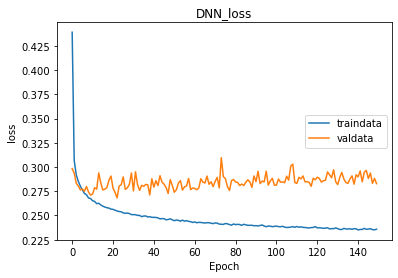

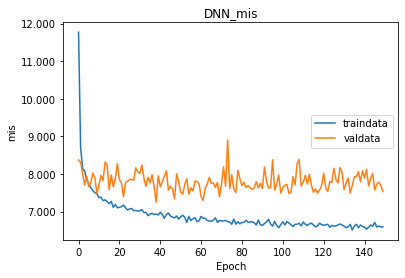

In [27]:

seed=3
momentum=0
num_epochs=150
learning_rate=0.1



net = DNN() 
torch.manual_seed(seed)  
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss().cuda()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))
    
    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('DNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('DNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

seed=4

epoch1:train_setÔºöerror=0.4427,mis=11.95,test_setÔºöerror=0.3063,mis=8.86
epoch2:train_setÔºöerror=0.3071,mis=8.709999999999999,test_setÔºöerror=0.2867,mis=8.09
epoch3:train_setÔºöerror=0.2924,mis=8.219999999999999,test_setÔºöerror=0.2885,mis=8.260000000000002
epoch4:train_setÔºöerror=0.2858,mis=8.1,test_setÔºöerror=0.2999,mis=8.73
epoch5:train_setÔºöerror=0.2802,mis=7.829999999999999,test_setÔºöerror=0.2832,mis=7.960000000000001
epoch6:train_setÔºöerror=0.2764,mis=7.7299999999999995,test_setÔºöerror=0.2843,mis=7.9
epoch7:train_setÔºöerror=0.2737,mis=7.630000000000001,test_setÔºöerror=0.2869,mis=7.9
epoch8:train_setÔºöerror=0.2709,mis=7.62,test_setÔºöerror=0.2871,mis=8.04
epoch9:train_setÔºöerror=0.2693,mis=7.5600000000000005,test_setÔºöerror=0.2683,mis=7.53
epoch10:train_setÔºöerror=0.2667,mis=7.470000000000001,test_setÔºöerror=0.2761,mis=7.66
epoch11:train_setÔºöerror=0.2652,mis=7.39,test_setÔºöerror=0.3017,mis=8.649999999999999
epoch12:train_setÔºöerror=0.2639,mis=7.3,test_setÔºöer

epoch105:train_setÔºöerror=0.2388,mis=6.69,test_setÔºöerror=0.2874,mis=7.88
epoch106:train_setÔºöerror=0.2381,mis=6.69,test_setÔºöerror=0.2843,mis=7.5200000000000005
epoch107:train_setÔºöerror=0.2384,mis=6.64,test_setÔºöerror=0.2886,mis=7.739999999999999
epoch108:train_setÔºöerror=0.2385,mis=6.64,test_setÔºöerror=0.2805,mis=7.53
epoch109:train_setÔºöerror=0.2375,mis=6.65,test_setÔºöerror=0.2862,mis=7.55
epoch110:train_setÔºöerror=0.2386,mis=6.65,test_setÔºöerror=0.2845,mis=7.68
epoch111:train_setÔºöerror=0.2377,mis=6.68,test_setÔºöerror=0.2879,mis=7.720000000000001
epoch112:train_setÔºöerror=0.2382,mis=6.63,test_setÔºöerror=0.2798,mis=7.7
epoch113:train_setÔºöerror=0.2377,mis=6.67,test_setÔºöerror=0.285,mis=7.720000000000001
epoch114:train_setÔºöerror=0.2376,mis=6.61,test_setÔºöerror=0.2803,mis=7.449999999999999
epoch115:train_setÔºöerror=0.237,mis=6.7,test_setÔºöerror=0.2848,mis=7.79
epoch116:train_setÔºöerror=0.2375,mis=6.550000000000001,test_setÔºöerror=0.2906,mis=8.03
epoch117:trai

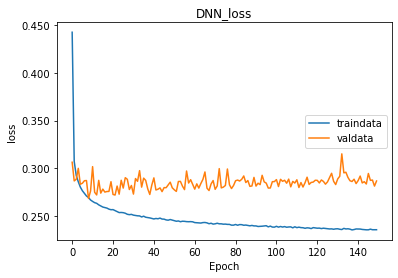

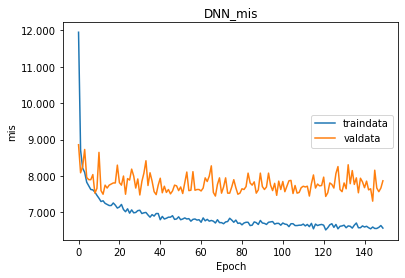

In [28]:

seed=4
momentum=0
num_epochs=150
learning_rate=0.1

net = DNN()
torch.manual_seed(seed) 
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss().cuda()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('DNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('DNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

seed=5

epoch1:train_setÔºöerror=0.4419,mis=11.86,test_setÔºöerror=0.3089,mis=8.84
epoch2:train_setÔºöerror=0.3074,mis=8.67,test_setÔºöerror=0.2921,mis=8.21
epoch3:train_setÔºöerror=0.2932,mis=8.219999999999999,test_setÔºöerror=0.285,mis=8.06
epoch4:train_setÔºöerror=0.2845,mis=7.91,test_setÔºöerror=0.2919,mis=8.07
epoch5:train_setÔºöerror=0.2805,mis=7.9,test_setÔºöerror=0.2829,mis=8.07
epoch6:train_setÔºöerror=0.2763,mis=7.7,test_setÔºöerror=0.2731,mis=7.580000000000001
epoch7:train_setÔºöerror=0.2737,mis=7.6,test_setÔºöerror=0.3005,mis=8.83
epoch8:train_setÔºöerror=0.2714,mis=7.6,test_setÔºöerror=0.2829,mis=7.7700000000000005
epoch9:train_setÔºöerror=0.2686,mis=7.55,test_setÔºöerror=0.2738,mis=7.6
epoch10:train_setÔºöerror=0.2664,mis=7.42,test_setÔºöerror=0.2796,mis=7.720000000000001
epoch11:train_setÔºöerror=0.2652,mis=7.41,test_setÔºöerror=0.283,mis=7.84
epoch12:train_setÔºöerror=0.2637,mis=7.340000000000001,test_setÔºöerror=0.2904,mis=8.459999999999999
epoch13:train_setÔºöerror=0.2634,mis

epoch104:train_setÔºöerror=0.2379,mis=6.67,test_setÔºöerror=0.2902,mis=7.85
epoch105:train_setÔºöerror=0.2381,mis=6.6000000000000005,test_setÔºöerror=0.2824,mis=7.5
epoch106:train_setÔºöerror=0.2386,mis=6.7299999999999995,test_setÔºöerror=0.2893,mis=7.7700000000000005
epoch107:train_setÔºöerror=0.2386,mis=6.65,test_setÔºöerror=0.3018,mis=8.129999999999999
epoch108:train_setÔºöerror=0.2382,mis=6.64,test_setÔºöerror=0.28,mis=7.6899999999999995
epoch109:train_setÔºöerror=0.2387,mis=6.68,test_setÔºöerror=0.2891,mis=7.79
epoch110:train_setÔºöerror=0.2377,mis=6.58,test_setÔºöerror=0.2808,mis=7.61
epoch111:train_setÔºöerror=0.2375,mis=6.64,test_setÔºöerror=0.2841,mis=7.6
epoch112:train_setÔºöerror=0.2373,mis=6.61,test_setÔºöerror=0.2816,mis=7.79
epoch113:train_setÔºöerror=0.2378,mis=6.65,test_setÔºöerror=0.2856,mis=7.55
epoch114:train_setÔºöerror=0.2375,mis=6.58,test_setÔºöerror=0.288,mis=7.88
epoch115:train_setÔºöerror=0.2379,mis=6.67,test_setÔºöerror=0.2844,mis=7.68
epoch116:train_setÔºöerr

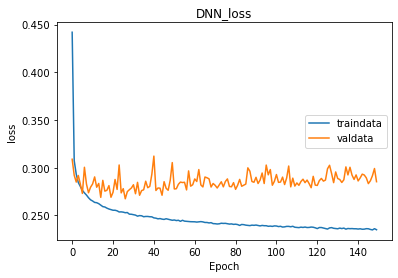

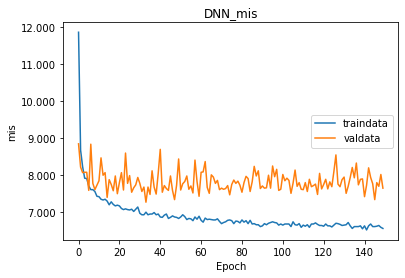

In [29]:

seed=5
momentum=0
num_epochs=150
learning_rate=0.1


#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = DNN()#.to(device) 
torch.manual_seed(seed)  # gpu
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss()#.cuda()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32)#.to(device)
        label = label#.to(device)
        input = input.reshape(-1, 784)
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32)#.to(device)
        label = label#.to(device)
        input = input.reshape(-1, 784)
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))
    #torch.save(net.state_dict(), os.path.join(summary_path + '/epoch_{}_test_e_{}.pth'.format(epoch + 1,v_l)))

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('DNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('DNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

From above, we find that, the behavior of cross-entropy and misclassification are very similar. We may find the mean validation error is fluctuating and seem to decrease when the mean training error has a general trend of decreasing, and validation error will be higher than training error. 

The shape of W is (28, 28).


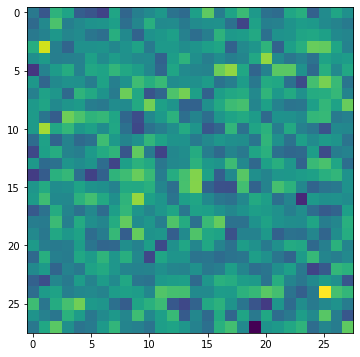

In [18]:
# The weight when seed=3, because it has lower misclassification error.
trained_weights = net.net[0].weight.detach().numpy()
W = np.sum(trained_weights.reshape(28,28,100),axis=2)
print(f'The shape of W is {W.shape}.')
fig = plt.figure(figsize=(6, 6))
plt.imshow(W);

The weight from the best model seems good as it's either not too noisy or too correlated.

Next we fixed momentem and change learning rate to see how convergence rate change.

# lr=0.01,momentum=0

epoch1:train_setÔºöerror=1.086,mis=22.91,test_setÔºöerror=0.5398,mis=13.05
epoch2:train_setÔºöerror=0.4742,mis=12.35,test_setÔºöerror=0.3963,mis=10.549999999999999
epoch3:train_setÔºöerror=0.3921,mis=10.870000000000001,test_setÔºöerror=0.3512,mis=10.0
epoch4:train_setÔºöerror=0.3591,mis=10.16,test_setÔºöerror=0.33,mis=9.34
epoch5:train_setÔºöerror=0.3407,mis=9.69,test_setÔºöerror=0.3166,mis=9.0
epoch6:train_setÔºöerror=0.3282,mis=9.370000000000001,test_setÔºöerror=0.3076,mis=8.73
epoch7:train_setÔºöerror=0.3191,mis=9.13,test_setÔºöerror=0.3012,mis=8.49
epoch8:train_setÔºöerror=0.312,mis=8.84,test_setÔºöerror=0.2971,mis=8.36
epoch9:train_setÔºöerror=0.3067,mis=8.690000000000001,test_setÔºöerror=0.2922,mis=8.3
epoch10:train_setÔºöerror=0.3021,mis=8.52,test_setÔºöerror=0.2894,mis=8.05
epoch11:train_setÔºöerror=0.2981,mis=8.41,test_setÔºöerror=0.2868,mis=8.12
epoch12:train_setÔºöerror=0.2948,mis=8.309999999999999,test_setÔºöerror=0.2846,mis=7.91
epoch13:train_setÔºöerror=0.292,mis=8.219999

epoch103:train_setÔºöerror=0.2432,mis=6.67,test_setÔºöerror=0.2642,mis=7.489999999999999
epoch104:train_setÔºöerror=0.2431,mis=6.72,test_setÔºöerror=0.2657,mis=7.41
epoch105:train_setÔºöerror=0.2429,mis=6.69,test_setÔºöerror=0.267,mis=7.489999999999999
epoch106:train_setÔºöerror=0.2429,mis=6.7,test_setÔºöerror=0.2656,mis=7.42
epoch107:train_setÔºöerror=0.2425,mis=6.68,test_setÔºöerror=0.2658,mis=7.55
epoch108:train_setÔºöerror=0.2424,mis=6.65,test_setÔºöerror=0.2652,mis=7.35
epoch109:train_setÔºöerror=0.2422,mis=6.64,test_setÔºöerror=0.2662,mis=7.48
epoch110:train_setÔºöerror=0.2421,mis=6.61,test_setÔºöerror=0.2655,mis=7.449999999999999
epoch111:train_setÔºöerror=0.242,mis=6.64,test_setÔºöerror=0.2663,mis=7.3999999999999995
epoch112:train_setÔºöerror=0.2421,mis=6.69,test_setÔºöerror=0.2648,mis=7.53
epoch113:train_setÔºöerror=0.2417,mis=6.710000000000001,test_setÔºöerror=0.2663,mis=7.42
epoch114:train_setÔºöerror=0.2414,mis=6.65,test_setÔºöerror=0.2658,mis=7.5200000000000005
epoch115:tr

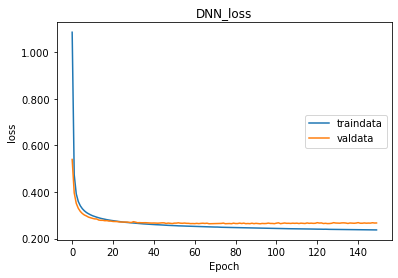

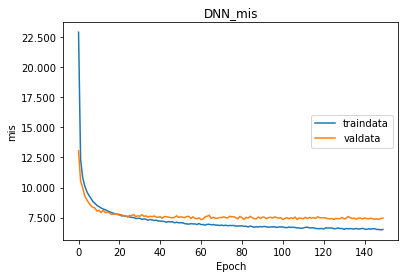

In [30]:

seed=1
momentum=0
num_epochs=150
learning_rate=0.01

net = DNN() 
torch.manual_seed(seed) 
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('DNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('DNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

# lr=0.2,momentum=0

epoch1:train_setÔºöerror=0.3954,mis=11.06,test_setÔºöerror=0.3026,mis=8.49
epoch2:train_setÔºöerror=0.3108,mis=8.799999999999999,test_setÔºöerror=0.2935,mis=8.6
epoch3:train_setÔºöerror=0.2987,mis=8.33,test_setÔºöerror=0.2946,mis=8.450000000000001
epoch4:train_setÔºöerror=0.2907,mis=8.25,test_setÔºöerror=0.285,mis=8.02
epoch5:train_setÔºöerror=0.2878,mis=8.09,test_setÔºöerror=0.295,mis=8.4
epoch6:train_setÔºöerror=0.2836,mis=7.920000000000001,test_setÔºöerror=0.2888,mis=8.3
epoch7:train_setÔºöerror=0.2795,mis=7.86,test_setÔºöerror=0.2829,mis=8.27
epoch8:train_setÔºöerror=0.2785,mis=7.8100000000000005,test_setÔºöerror=0.2773,mis=7.670000000000001
epoch9:train_setÔºöerror=0.2767,mis=7.739999999999999,test_setÔºöerror=0.2861,mis=7.93
epoch10:train_setÔºöerror=0.2754,mis=7.7700000000000005,test_setÔºöerror=0.2976,mis=8.18
epoch11:train_setÔºöerror=0.2737,mis=7.6899999999999995,test_setÔºöerror=0.2906,mis=7.9
epoch12:train_setÔºöerror=0.2713,mis=7.5600000000000005,test_setÔºöerror=0.2825,mi

epoch105:train_setÔºöerror=0.2482,mis=6.98,test_setÔºöerror=0.3052,mis=8.42
epoch106:train_setÔºöerror=0.2476,mis=7.049999999999999,test_setÔºöerror=0.3135,mis=8.53
epoch107:train_setÔºöerror=0.2474,mis=6.9,test_setÔºöerror=0.3056,mis=8.459999999999999
epoch108:train_setÔºöerror=0.2478,mis=6.950000000000001,test_setÔºöerror=0.2859,mis=7.720000000000001
epoch109:train_setÔºöerror=0.2466,mis=7.000000000000001,test_setÔºöerror=0.3008,mis=8.06
epoch110:train_setÔºöerror=0.2476,mis=7.01,test_setÔºöerror=0.3151,mis=8.41
epoch111:train_setÔºöerror=0.2469,mis=6.99,test_setÔºöerror=0.2997,mis=8.05
epoch112:train_setÔºöerror=0.2481,mis=6.88,test_setÔºöerror=0.3088,mis=8.52
epoch113:train_setÔºöerror=0.2469,mis=6.87,test_setÔºöerror=0.325,mis=8.86
epoch114:train_setÔºöerror=0.2465,mis=6.99,test_setÔºöerror=0.3143,mis=8.73
epoch115:train_setÔºöerror=0.2473,mis=7.01,test_setÔºöerror=0.3033,mis=8.42
epoch116:train_setÔºöerror=0.2474,mis=6.97,test_setÔºöerror=0.3087,mis=8.260000000000002
epoch117:tra

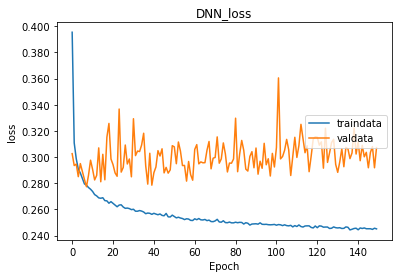

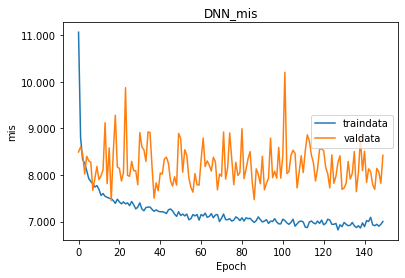

In [32]:

seed=1
momentum=0
num_epochs=150
learning_rate=0.2
dir_index = num
net = DNN()
torch.manual_seed(seed)  
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss().cuda()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))
    
    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('DNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('DNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

# lr=0.5,momentum=0

epoch1:train_setÔºöerror=0.4256,mis=12.479999999999999,test_setÔºöerror=0.3286,mis=9.3
epoch2:train_setÔºöerror=0.358,mis=10.23,test_setÔºöerror=0.3256,mis=9.29
epoch3:train_setÔºöerror=0.3473,mis=9.9,test_setÔºöerror=0.3631,mis=10.5
epoch4:train_setÔºöerror=0.3358,mis=9.64,test_setÔºöerror=0.3445,mis=9.42
epoch5:train_setÔºöerror=0.3336,mis=9.54,test_setÔºöerror=0.4152,mis=12.11
epoch6:train_setÔºöerror=0.3285,mis=9.32,test_setÔºöerror=0.33,mis=9.21
epoch7:train_setÔºöerror=0.3225,mis=9.1,test_setÔºöerror=0.3128,mis=8.99
epoch8:train_setÔºöerror=0.3228,mis=9.16,test_setÔºöerror=0.3087,mis=8.39
epoch9:train_setÔºöerror=0.3199,mis=9.1,test_setÔºöerror=0.3539,mis=9.9
epoch10:train_setÔºöerror=0.3211,mis=9.15,test_setÔºöerror=0.3616,mis=9.66
epoch11:train_setÔºöerror=0.3173,mis=9.04,test_setÔºöerror=0.3521,mis=9.28
epoch12:train_setÔºöerror=0.3153,mis=8.88,test_setÔºöerror=0.324,mis=8.55
epoch13:train_setÔºöerror=0.3142,mis=8.83,test_setÔºöerror=0.3634,mis=10.6
epoch14:train_setÔºöerror=0

epoch109:train_setÔºöerror=0.2986,mis=8.540000000000001,test_setÔºöerror=0.3892,mis=10.489999999999998
epoch110:train_setÔºöerror=0.3013,mis=8.540000000000001,test_setÔºöerror=0.3978,mis=10.94
epoch111:train_setÔºöerror=0.2992,mis=8.49,test_setÔºöerror=0.3396,mis=8.89
epoch112:train_setÔºöerror=0.3036,mis=8.62,test_setÔºöerror=0.4269,mis=11.799999999999999
epoch113:train_setÔºöerror=0.2998,mis=8.42,test_setÔºöerror=0.4186,mis=11.379999999999999
epoch114:train_setÔºöerror=0.2974,mis=8.55,test_setÔºöerror=0.4328,mis=12.34
epoch115:train_setÔºöerror=0.3005,mis=8.52,test_setÔºöerror=0.347,mis=9.68
epoch116:train_setÔºöerror=0.3011,mis=8.57,test_setÔºöerror=0.4283,mis=11.24
epoch117:train_setÔºöerror=0.3016,mis=8.57,test_setÔºöerror=0.3376,mis=9.08
epoch118:train_setÔºöerror=0.2982,mis=8.39,test_setÔºöerror=0.3626,mis=9.790000000000001
epoch119:train_setÔºöerror=0.2978,mis=8.5,test_setÔºöerror=0.4161,mis=11.98
epoch120:train_setÔºöerror=0.3024,mis=8.63,test_setÔºöerror=0.3938,mis=10.4899999

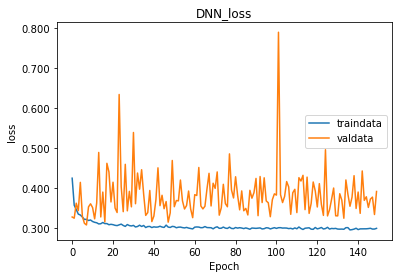

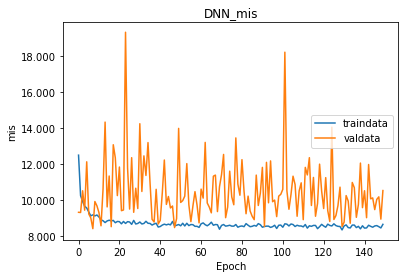

In [6]:

seed=1
momentum=0
num_epochs=150
learning_rate=0.5



net = DNN()
torch.manual_seed(seed)  
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss().cuda()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('DNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('DNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

# lr=0.1,momentum=0.5

epoch1:train_setÔºöerror=0.3913,mis=10.94,test_setÔºöerror=0.291,mis=8.09
epoch2:train_setÔºöerror=0.3074,mis=8.66,test_setÔºöerror=0.2947,mis=8.77
epoch3:train_setÔºöerror=0.2952,mis=8.200000000000001,test_setÔºöerror=0.2883,mis=8.06
epoch4:train_setÔºöerror=0.2886,mis=8.19,test_setÔºöerror=0.2782,mis=7.7299999999999995
epoch5:train_setÔºöerror=0.2853,mis=8.01,test_setÔºöerror=0.2827,mis=7.95
epoch6:train_setÔºöerror=0.2813,mis=7.85,test_setÔºöerror=0.2829,mis=8.23
epoch7:train_setÔºöerror=0.2775,mis=7.7700000000000005,test_setÔºöerror=0.2875,mis=8.44
epoch8:train_setÔºöerror=0.2762,mis=7.6899999999999995,test_setÔºöerror=0.2758,mis=7.76
epoch9:train_setÔºöerror=0.2751,mis=7.6899999999999995,test_setÔºöerror=0.2813,mis=7.870000000000001
epoch10:train_setÔºöerror=0.2737,mis=7.6499999999999995,test_setÔºöerror=0.2947,mis=7.99
epoch11:train_setÔºöerror=0.2718,mis=7.61,test_setÔºöerror=0.2861,mis=7.93
epoch12:train_setÔºöerror=0.2697,mis=7.55,test_setÔºöerror=0.2842,mis=8.01
epoch13:train

epoch107:train_setÔºöerror=0.246,mis=6.909999999999999,test_setÔºöerror=0.2964,mis=8.09
epoch108:train_setÔºöerror=0.2467,mis=6.909999999999999,test_setÔºöerror=0.2868,mis=7.7
epoch109:train_setÔºöerror=0.2456,mis=6.92,test_setÔºöerror=0.2946,mis=7.920000000000001
epoch110:train_setÔºöerror=0.2463,mis=6.890000000000001,test_setÔºöerror=0.3059,mis=7.86
epoch111:train_setÔºöerror=0.2459,mis=6.909999999999999,test_setÔºöerror=0.3005,mis=8.04
epoch112:train_setÔºöerror=0.2467,mis=6.8500000000000005,test_setÔºöerror=0.2975,mis=7.95
epoch113:train_setÔºöerror=0.2458,mis=6.890000000000001,test_setÔºöerror=0.3171,mis=8.559999999999999
epoch114:train_setÔºöerror=0.2457,mis=6.950000000000001,test_setÔºöerror=0.3009,mis=8.260000000000002
epoch115:train_setÔºöerror=0.2463,mis=6.97,test_setÔºöerror=0.3036,mis=8.469999999999999
epoch116:train_setÔºöerror=0.2462,mis=6.94,test_setÔºöerror=0.3054,mis=8.290000000000001
epoch117:train_setÔºöerror=0.2463,mis=6.890000000000001,test_setÔºöerror=0.2857,mis=7

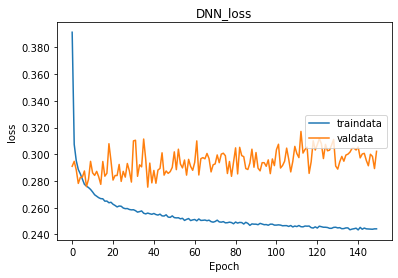

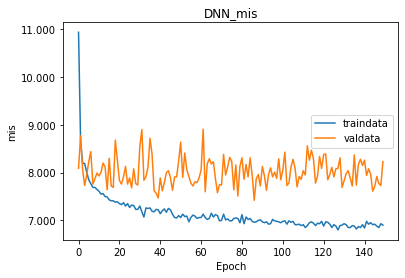

In [23]:

seed=1
momentum=0.5
num_epochs=150
learning_rate=0.1

net = DNN()
torch.manual_seed(seed)  
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))
    
    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('DNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('DNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

# lr=0.1,momentum=0.9

epoch1:train_setÔºöerror=0.4799,mis=13.48,test_setÔºöerror=0.3601,mis=9.879999999999999
epoch2:train_setÔºöerror=0.4301,mis=11.899999999999999,test_setÔºöerror=0.3545,mis=9.74
epoch3:train_setÔºöerror=0.408,mis=11.25,test_setÔºöerror=0.4234,mis=11.82
epoch4:train_setÔºöerror=0.42,mis=11.5,test_setÔºöerror=0.4139,mis=11.35
epoch5:train_setÔºöerror=0.4039,mis=11.01,test_setÔºöerror=0.5138,mis=13.52
epoch6:train_setÔºöerror=0.4013,mis=11.129999999999999,test_setÔºöerror=0.369,mis=10.040000000000001
epoch7:train_setÔºöerror=0.4043,mis=11.01,test_setÔºöerror=0.4278,mis=11.89
epoch8:train_setÔºöerror=0.409,mis=11.12,test_setÔºöerror=0.4263,mis=11.17
epoch9:train_setÔºöerror=0.4169,mis=11.3,test_setÔºöerror=0.5073,mis=13.81
epoch10:train_setÔºöerror=0.4301,mis=11.61,test_setÔºöerror=0.5285,mis=12.8
epoch11:train_setÔºöerror=0.417,mis=11.28,test_setÔºöerror=0.4146,mis=10.71
epoch12:train_setÔºöerror=0.4067,mis=10.94,test_setÔºöerror=0.3993,mis=11.0
epoch13:train_setÔºöerror=0.41,mis=11.25,test

epoch107:train_setÔºöerror=0.4003,mis=10.71,test_setÔºöerror=0.465,mis=11.08
epoch108:train_setÔºöerror=0.4108,mis=10.96,test_setÔºöerror=0.4055,mis=10.12
epoch109:train_setÔºöerror=0.424,mis=11.34,test_setÔºöerror=0.4683,mis=11.35
epoch110:train_setÔºöerror=0.3965,mis=10.71,test_setÔºöerror=0.3768,mis=9.43
epoch111:train_setÔºöerror=0.3992,mis=10.76,test_setÔºöerror=0.4621,mis=11.48
epoch112:train_setÔºöerror=0.3976,mis=10.52,test_setÔºöerror=0.4113,mis=9.94
epoch113:train_setÔºöerror=0.3933,mis=10.47,test_setÔºöerror=0.4545,mis=12.049999999999999
epoch114:train_setÔºöerror=0.4011,mis=10.8,test_setÔºöerror=0.513,mis=13.239999999999998
epoch115:train_setÔºöerror=0.4041,mis=10.9,test_setÔºöerror=0.4307,mis=11.700000000000001
epoch116:train_setÔºöerror=0.4183,mis=11.15,test_setÔºöerror=0.4808,mis=12.29
epoch117:train_setÔºöerror=0.4056,mis=10.92,test_setÔºöerror=0.4062,mis=10.45
epoch118:train_setÔºöerror=0.4016,mis=10.85,test_setÔºöerror=0.4716,mis=11.020000000000001
epoch119:train_setÔ

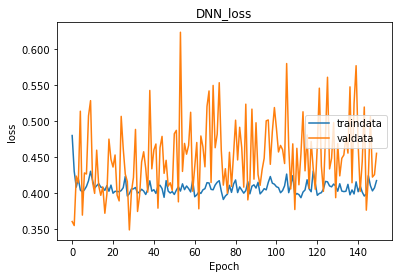

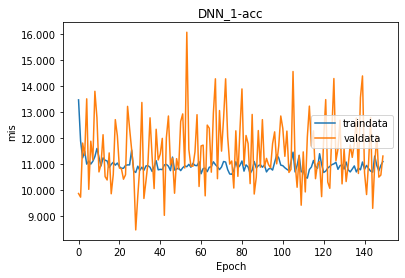

In [24]:

seed=1
momentum=0.9
num_epochs=150
learning_rate=0.1


net = DNN()
torch.manual_seed(seed) 
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32)
        label = label
        input = input.reshape(-1, 784)
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('DNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('DNN_1-acc')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

Even if higher momentum and learning rate may increase convergence rate, if the momentum and learing rate are too high,it makes corss entropy loss and misclasification error for both training data and validation data very unstable, because it may causes the network jump out the local minima.lr =0.01 is very good because it gets lower misclassification error rate, however it updates very slow.Though the best parameter set we mentioned above is  {ùëôùëü=0.01, momentum=0}, We still consider {lr=0.1,momentum=0} ,as generally the error decrease faster than lr=0.01, and the minumum error when lr=0.1 seem to be smaller than others.


# Question 4 

In [9]:
class CNN(nn.Module):
    def __init__(self, input_channels=1,channels=100,output_channels=10):
        super(CNN, self).__init__()#input shape 1*28*28
        self.conv1=nn.Conv2d(in_channels=1, out_channels=64, stride=1, kernel_size=3, padding=1)#output shape 64*28*28
        self.relu=nn.ReLU()
        self.pool=nn.MaxPool2d(2, 2)#output shape 64*14*14
        self.conv2=nn.Conv2d(in_channels=64, out_channels=10, stride=1, kernel_size=3, padding=1)
        self.linear=nn.Linear(1960, 10)#10*14*14
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)  # flat (batch_size, 32*7*7)
        x = self.linear(x)
        return x

seed=1

epoch1:train_setÔºöerror=0.2799,mis=8.43,test_setÔºöerror=0.1199,mis=3.64
epoch2:train_setÔºöerror=0.1138,mis=3.4000000000000004,test_setÔºöerror=0.0754,mis=2.4
epoch3:train_setÔºöerror=0.0822,mis=2.4299999999999997,test_setÔºöerror=0.0618,mis=2.02
epoch4:train_setÔºöerror=0.0635,mis=1.94,test_setÔºöerror=0.054,mis=1.87
epoch5:train_setÔºöerror=0.054,mis=1.67,test_setÔºöerror=0.05,mis=1.7000000000000002
epoch6:train_setÔºöerror=0.047,mis=1.48,test_setÔºöerror=0.0419,mis=1.46
epoch7:train_setÔºöerror=0.0423,mis=1.27,test_setÔºöerror=0.0466,mis=1.72
epoch8:train_setÔºöerror=0.038,mis=1.13,test_setÔºöerror=0.0507,mis=1.7999999999999998
epoch9:train_setÔºöerror=0.034,mis=1.04,test_setÔºöerror=0.0482,mis=1.63
epoch10:train_setÔºöerror=0.0324,mis=1.0,test_setÔºöerror=0.0424,mis=1.44
epoch11:train_setÔºöerror=0.0288,mis=0.89,test_setÔºöerror=0.0417,mis=1.3599999999999999
epoch12:train_setÔºöerror=0.0271,mis=0.84,test_setÔºöerror=0.042,mis=1.23
epoch13:train_setÔºöerror=0.0252,mis=0.8,test_set

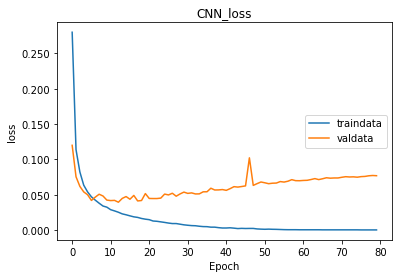

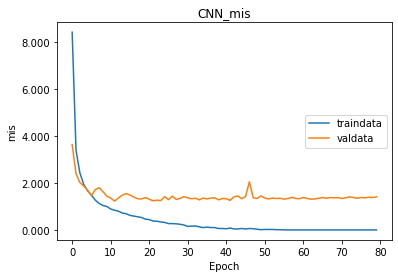

In [10]:

seed=1
num_epochs=80
learning_rate=0.1
momentum=0

net = CNN() 
torch.manual_seed(seed)  
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss().cuda()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))
    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('CNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('CNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

seed=2

epoch1:train_setÔºöerror=0.239,mis=7.28,test_setÔºöerror=0.1689,mis=5.1
epoch2:train_setÔºöerror=0.0924,mis=2.8000000000000003,test_setÔºöerror=0.0652,mis=2.01
epoch3:train_setÔºöerror=0.0712,mis=2.17,test_setÔºöerror=0.0608,mis=1.9900000000000002
epoch4:train_setÔºöerror=0.0601,mis=1.8399999999999999,test_setÔºöerror=0.0466,mis=1.53
epoch5:train_setÔºöerror=0.053,mis=1.59,test_setÔºöerror=0.0521,mis=1.68
epoch6:train_setÔºöerror=0.0484,mis=1.53,test_setÔºöerror=0.0488,mis=1.54
epoch7:train_setÔºöerror=0.0435,mis=1.35,test_setÔºöerror=0.0483,mis=1.5699999999999998
epoch8:train_setÔºöerror=0.0407,mis=1.27,test_setÔºöerror=0.0537,mis=1.66
epoch9:train_setÔºöerror=0.0386,mis=1.2,test_setÔºöerror=0.0443,mis=1.41
epoch10:train_setÔºöerror=0.0357,mis=1.16,test_setÔºöerror=0.0477,mis=1.4500000000000002
epoch11:train_setÔºöerror=0.0339,mis=1.05,test_setÔºöerror=0.0621,mis=2.02
epoch12:train_setÔºöerror=0.0325,mis=1.03,test_setÔºöerror=0.0461,mis=1.22
epoch13:train_setÔºöerror=0.0309,mis=0.9900

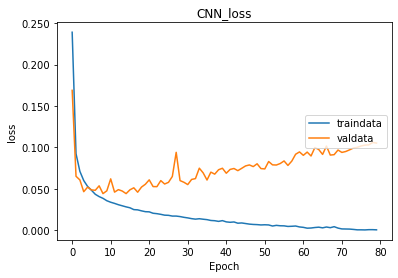

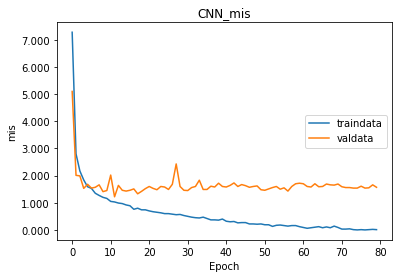

In [11]:
num=2
seed=2
num_epochs=80
learning_rate=0.1
momentum=0

net = CNN()
torch.manual_seed(seed) 
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('CNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('CNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

seed=3

epoch1:train_setÔºöerror=0.285,mis=8.559999999999999,test_setÔºöerror=0.0939,mis=2.8899999999999997
epoch2:train_setÔºöerror=0.087,mis=2.62,test_setÔºöerror=0.0623,mis=2.01
epoch3:train_setÔºöerror=0.0663,mis=1.9900000000000002,test_setÔºöerror=0.05,mis=1.6199999999999999
epoch4:train_setÔºöerror=0.0565,mis=1.76,test_setÔºöerror=0.0504,mis=1.6400000000000001
epoch5:train_setÔºöerror=0.0501,mis=1.51,test_setÔºöerror=0.0446,mis=1.48
epoch6:train_setÔºöerror=0.0455,mis=1.38,test_setÔºöerror=0.0616,mis=1.8499999999999999
epoch7:train_setÔºöerror=0.0419,mis=1.32,test_setÔºöerror=0.0411,mis=1.31
epoch8:train_setÔºöerror=0.0379,mis=1.18,test_setÔºöerror=0.0748,mis=2.37
epoch9:train_setÔºöerror=0.0352,mis=1.1400000000000001,test_setÔºöerror=0.043,mis=1.34
epoch10:train_setÔºöerror=0.0336,mis=1.04,test_setÔºöerror=0.0378,mis=1.28
epoch11:train_setÔºöerror=0.0309,mis=1.03,test_setÔºöerror=0.0455,mis=1.49
epoch12:train_setÔºöerror=0.0291,mis=0.95,test_setÔºöerror=0.0606,mis=1.94
epoch13:train_set

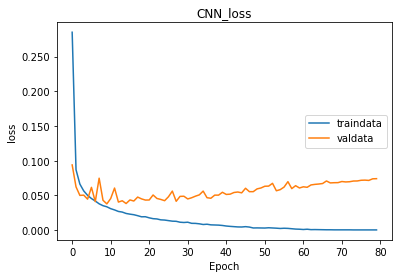

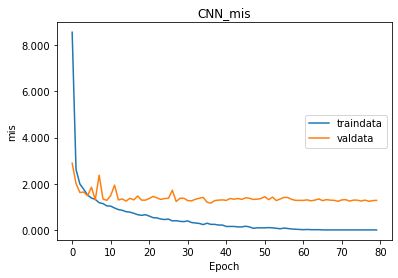

In [12]:
num=3
seed=3
num_epochs=80
learning_rate=0.1
momentum=0

net = CNN()
torch.manual_seed(seed) 
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))
    

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('CNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('CNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

seed=4

epoch1:train_setÔºöerror=0.2818,mis=8.690000000000001,test_setÔºöerror=0.106,mis=3.2
epoch2:train_setÔºöerror=0.1041,mis=3.1,test_setÔºöerror=0.0769,mis=2.46
epoch3:train_setÔºöerror=0.0844,mis=2.5700000000000003,test_setÔºöerror=0.0814,mis=2.75
epoch4:train_setÔºöerror=0.0726,mis=2.18,test_setÔºöerror=0.0624,mis=1.8599999999999999
epoch5:train_setÔºöerror=0.0662,mis=1.9900000000000002,test_setÔºöerror=0.0678,mis=2.26
epoch6:train_setÔºöerror=0.0612,mis=1.92,test_setÔºöerror=0.0559,mis=1.96
epoch7:train_setÔºöerror=0.0562,mis=1.73,test_setÔºöerror=0.0577,mis=1.7999999999999998
epoch8:train_setÔºöerror=0.0529,mis=1.59,test_setÔºöerror=0.0533,mis=1.72
epoch9:train_setÔºöerror=0.0493,mis=1.52,test_setÔºöerror=0.0546,mis=1.77
epoch10:train_setÔºöerror=0.0467,mis=1.44,test_setÔºöerror=0.0516,mis=1.76
epoch11:train_setÔºöerror=0.0448,mis=1.4200000000000002,test_setÔºöerror=0.0538,mis=1.82
epoch12:train_setÔºöerror=0.0426,mis=1.35,test_setÔºöerror=0.0582,mis=1.92
epoch13:train_setÔºöerror=0.0

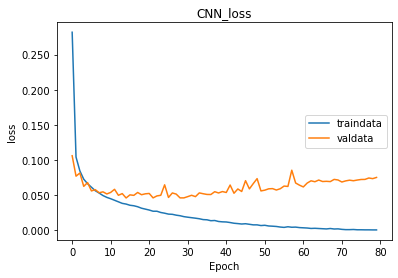

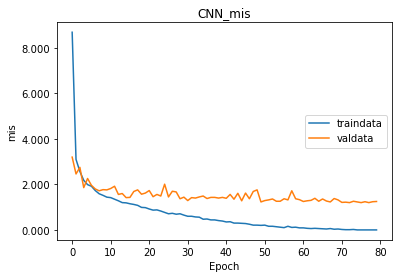

In [13]:

seed=4
num_epochs=80
learning_rate=0.1
momentum=0

net = CNN()
torch.manual_seed(seed)  
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('CNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('CNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

seed=5

epoch1:train_setÔºöerror=0.2537,mis=7.720000000000001,test_setÔºöerror=0.1018,mis=3.1300000000000003
epoch2:train_setÔºöerror=0.0994,mis=3.02,test_setÔºöerror=0.0799,mis=2.41
epoch3:train_setÔºöerror=0.0762,mis=2.34,test_setÔºöerror=0.1006,mis=3.26
epoch4:train_setÔºöerror=0.0627,mis=1.97,test_setÔºöerror=0.0817,mis=2.46
epoch5:train_setÔºöerror=0.0553,mis=1.71,test_setÔºöerror=0.0578,mis=1.91
epoch6:train_setÔºöerror=0.0492,mis=1.55,test_setÔºöerror=0.0503,mis=1.6199999999999999
epoch7:train_setÔºöerror=0.0437,mis=1.39,test_setÔºöerror=0.0506,mis=1.6400000000000001
epoch8:train_setÔºöerror=0.0406,mis=1.26,test_setÔºöerror=0.0501,mis=1.6
epoch9:train_setÔºöerror=0.0372,mis=1.15,test_setÔºöerror=0.0445,mis=1.46
epoch10:train_setÔºöerror=0.0345,mis=1.0999999999999999,test_setÔºöerror=0.0407,mis=1.32
epoch11:train_setÔºöerror=0.0323,mis=1.03,test_setÔºöerror=0.0435,mis=1.3599999999999999
epoch12:train_setÔºöerror=0.03,mis=0.97,test_setÔºöerror=0.0556,mis=1.7999999999999998
epoch13:train_s

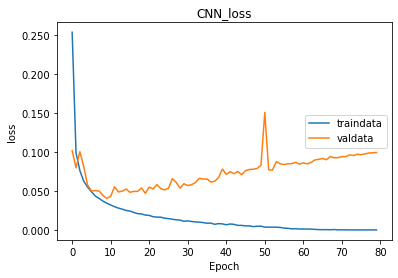

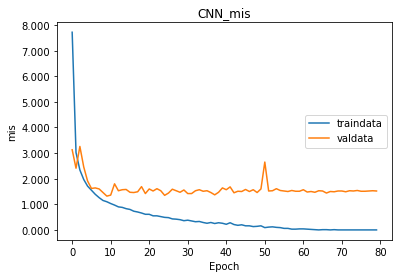

In [22]:
seed=5
num_epochs=80
learning_rate=0.1
momentum=0

net = CNN()
torch.manual_seed(seed)  
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('CNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('CNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

From above graph, we can see that the behavior of cross entropy loss and misclassification error are very similar, there exsit overfiting when epochs>40.So we use 80 epochs to stop early. Compare to question 3, since we add convotional and maxpool layer, the loss curve becomes more stable.

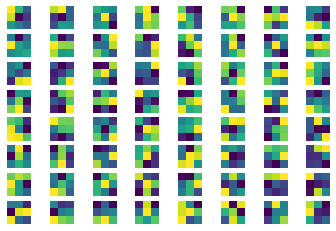

In [30]:
#vizualization
weights_1=net.state_dict()['conv1.weight'].cpu().numpy()
im = np.squeeze(weights_1,axis=1)
# [C, H, W] -> [H, W, C]
im = np.transpose(im, [1, 2, 0])
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    # [H, W, C]
    plt.imshow(im[:, :, i])
    plt.axis("off")
plt.show()

The weight from the best model seems good as it's either not too noisy or too correlated. This is weight when seed =4, since it has lowest misclassification error. 

Next we fixed momentum and change learning rate to see the performance.

# lr=0.01

epoch1:train_setÔºöerror=0.6837,mis=19.939999999999998,test_setÔºöerror=0.3166,mis=9.31
epoch2:train_setÔºöerror=0.3231,mis=9.54,test_setÔºöerror=0.2799,mis=8.03
epoch3:train_setÔºöerror=0.2779,mis=8.18,test_setÔºöerror=0.2405,mis=7.199999999999999
epoch4:train_setÔºöerror=0.2269,mis=6.58,test_setÔºöerror=0.1803,mis=5.25
epoch5:train_setÔºöerror=0.1774,mis=5.0,test_setÔºöerror=0.1471,mis=4.19
epoch6:train_setÔºöerror=0.1425,mis=4.05,test_setÔºöerror=0.1437,mis=4.279999999999999
epoch7:train_setÔºöerror=0.1182,mis=3.36,test_setÔºöerror=0.097,mis=2.8400000000000003
epoch8:train_setÔºöerror=0.1035,mis=2.94,test_setÔºöerror=0.091,mis=2.6599999999999997
epoch9:train_setÔºöerror=0.0926,mis=2.68,test_setÔºöerror=0.0909,mis=2.64
epoch10:train_setÔºöerror=0.084,mis=2.41,test_setÔºöerror=0.0743,mis=2.39
epoch11:train_setÔºöerror=0.0781,mis=2.26,test_setÔºöerror=0.0824,mis=2.65
epoch12:train_setÔºöerror=0.0735,mis=2.1399999999999997,test_setÔºöerror=0.0707,mis=2.16
epoch13:train_setÔºöerror=0.069

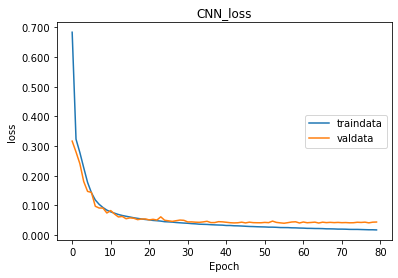

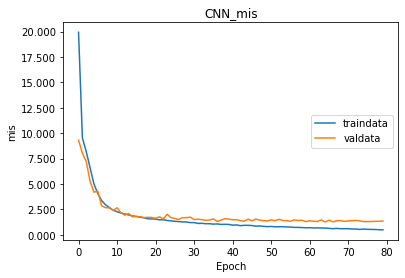

In [15]:
num=6
seed=1
num_epochs=80
learning_rate=0.01
momentum=0

net = CNN()
torch.cuda.manual_seed(seed)  
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('CNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('CNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

# lr=0.2

epoch1:train_setÔºöerror=0.2836,mis=8.7,test_setÔºöerror=0.079,mis=2.5700000000000003
epoch2:train_setÔºöerror=0.0886,mis=2.71,test_setÔºöerror=0.0601,mis=2.02
epoch3:train_setÔºöerror=0.0699,mis=2.11,test_setÔºöerror=0.0765,mis=2.5100000000000002
epoch4:train_setÔºöerror=0.0598,mis=1.8499999999999999,test_setÔºöerror=0.0514,mis=1.58
epoch5:train_setÔºöerror=0.054,mis=1.68,test_setÔºöerror=0.0506,mis=1.6400000000000001
epoch6:train_setÔºöerror=0.0485,mis=1.52,test_setÔºöerror=0.0444,mis=1.43
epoch7:train_setÔºöerror=0.0448,mis=1.37,test_setÔºöerror=0.0454,mis=1.52
epoch8:train_setÔºöerror=0.0424,mis=1.37,test_setÔºöerror=0.0528,mis=1.63
epoch9:train_setÔºöerror=0.0397,mis=1.22,test_setÔºöerror=0.0893,mis=2.74
epoch10:train_setÔºöerror=0.0374,mis=1.16,test_setÔºöerror=0.0527,mis=1.66
epoch11:train_setÔºöerror=0.0343,mis=1.0999999999999999,test_setÔºöerror=0.0442,mis=1.48
epoch12:train_setÔºöerror=0.0325,mis=1.0699999999999998,test_setÔºöerror=0.0472,mis=1.4000000000000001
epoch13:train_

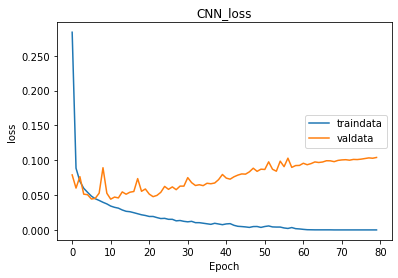

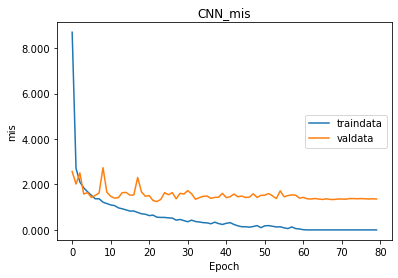

In [17]:

seed=1
num_epochs=80
learning_rate=0.2
momentum=0

net = CNN()
torch.manual_seed(seed) 
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('CNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('CNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

# lr=0.5

epoch1:train_setÔºöerror=2.302,mis=88.5,test_setÔºöerror=2.3014,mis=88.64999999999999
epoch2:train_setÔºöerror=2.3031,mis=89.14,test_setÔºöerror=2.3024,mis=88.64999999999999
epoch3:train_setÔºöerror=2.3032,mis=89.09,test_setÔºöerror=2.3016,mis=88.64999999999999
epoch4:train_setÔºöerror=2.3031,mis=89.16,test_setÔºöerror=2.3041,mis=89.68
epoch5:train_setÔºöerror=2.303,mis=89.36,test_setÔºöerror=2.3016,mis=88.64999999999999
epoch6:train_setÔºöerror=2.3031,mis=89.16,test_setÔºöerror=2.3025,mis=88.64999999999999
epoch7:train_setÔºöerror=2.3028,mis=89.19,test_setÔºöerror=2.3038,mis=88.64999999999999
epoch8:train_setÔºöerror=2.3032,mis=89.23,test_setÔºöerror=2.3028,mis=88.64999999999999
epoch9:train_setÔºöerror=2.3031,mis=89.23,test_setÔºöerror=2.3026,mis=89.68
epoch10:train_setÔºöerror=2.3031,mis=89.27000000000001,test_setÔºöerror=2.3044,mis=89.91
epoch11:train_setÔºöerror=2.3031,mis=89.12,test_setÔºöerror=2.3042,mis=88.64999999999999
epoch12:train_setÔºöerror=2.3031,mis=89.09,test_setÔºöerr

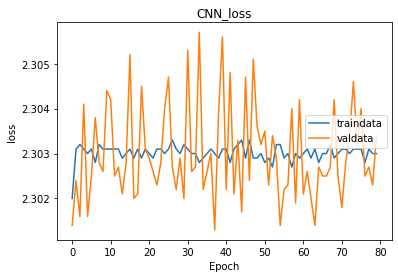

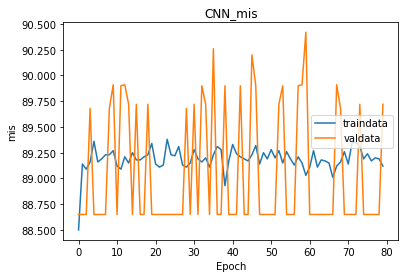

In [19]:

seed=1
num_epochs=80
learning_rate=0.5
momentum=0

net = CNN()
torch.manual_seed(seed)  
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('CNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('CNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

# lr=0.1,momentum=0.5

epoch1:train_setÔºöerror=0.3322,mis=10.07,test_setÔºöerror=0.1269,mis=3.9800000000000004
epoch2:train_setÔºöerror=0.1178,mis=3.52,test_setÔºöerror=0.0684,mis=2.1
epoch3:train_setÔºöerror=0.0817,mis=2.46,test_setÔºöerror=0.0616,mis=2.1
epoch4:train_setÔºöerror=0.0671,mis=2.01,test_setÔºöerror=0.0552,mis=1.79
epoch5:train_setÔºöerror=0.0599,mis=1.81,test_setÔºöerror=0.0595,mis=1.82
epoch6:train_setÔºöerror=0.054,mis=1.63,test_setÔºöerror=0.0495,mis=1.66
epoch7:train_setÔºöerror=0.0502,mis=1.58,test_setÔºöerror=0.0577,mis=1.9800000000000002
epoch8:train_setÔºöerror=0.0471,mis=1.47,test_setÔºöerror=0.0515,mis=1.72
epoch9:train_setÔºöerror=0.0426,mis=1.29,test_setÔºöerror=0.0556,mis=1.76
epoch10:train_setÔºöerror=0.0412,mis=1.29,test_setÔºöerror=0.0443,mis=1.37
epoch11:train_setÔºöerror=0.0386,mis=1.24,test_setÔºöerror=0.0435,mis=1.27
epoch12:train_setÔºöerror=0.0353,mis=1.08,test_setÔºöerror=0.0448,mis=1.44
epoch13:train_setÔºöerror=0.0345,mis=1.11,test_setÔºöerror=0.0472,mis=1.39
epoch14:

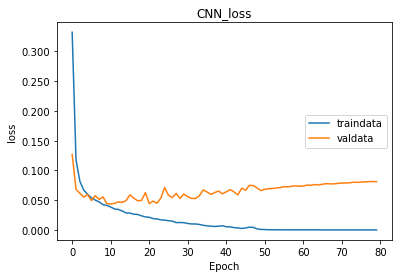

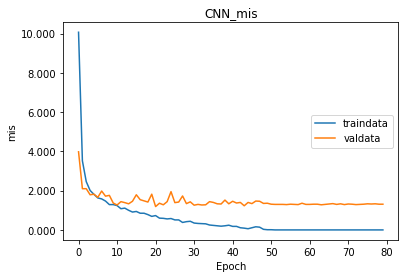

In [20]:

seed=1
num_epochs=80
learning_rate=0.1
momentum=0.5

net = CNN() 
torch.manual_seed(seed) 
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))
    

    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('CNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('CNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

# lr=0.1,momentum=0.9

epoch1:train_setÔºöerror=0.1856,mis=5.63,test_setÔºöerror=0.0837,mis=2.69
epoch2:train_setÔºöerror=0.0822,mis=2.48,test_setÔºöerror=0.0676,mis=2.17
epoch3:train_setÔºöerror=0.0634,mis=1.92,test_setÔºöerror=0.0681,mis=2.01
epoch4:train_setÔºöerror=0.0534,mis=1.69,test_setÔºöerror=0.0494,mis=1.59
epoch5:train_setÔºöerror=0.0496,mis=1.54,test_setÔºöerror=0.0546,mis=1.58
epoch6:train_setÔºöerror=0.0469,mis=1.47,test_setÔºöerror=0.0599,mis=1.71
epoch7:train_setÔºöerror=0.0436,mis=1.32,test_setÔºöerror=0.0499,mis=1.7000000000000002
epoch8:train_setÔºöerror=0.0364,mis=1.0999999999999999,test_setÔºöerror=0.0722,mis=1.6500000000000001
epoch9:train_setÔºöerror=0.0377,mis=1.1900000000000002,test_setÔºöerror=0.0553,mis=1.6199999999999999
epoch10:train_setÔºöerror=0.0365,mis=1.15,test_setÔºöerror=0.0956,mis=2.4
epoch11:train_setÔºöerror=0.039,mis=1.15,test_setÔºöerror=0.0622,mis=1.6
epoch12:train_setÔºöerror=0.0369,mis=1.09,test_setÔºöerror=0.0739,mis=1.81
epoch13:train_setÔºöerror=0.031,mis=0.96,t

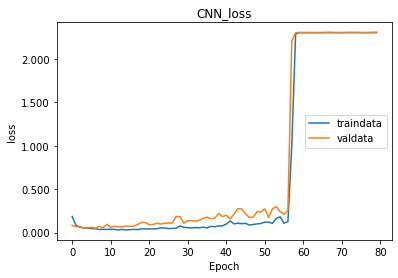

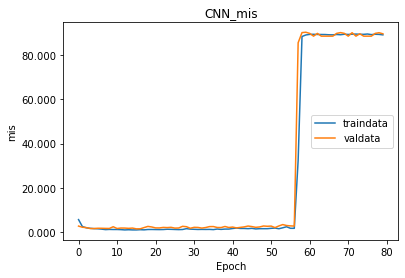

In [21]:

seed=1
num_epochs=80
learning_rate=0.1
momentum=0.9

net = CNN()
torch.manual_seed(seed) 
optimizer = optim.SGD(net.parameters(), lr=learning_rate,momentum=momentum)
criterion = nn.CrossEntropyLoss()
t_l_list = []
v_l_list = []
t_r_list = []
v_r_list = []
epoch_list = []
min_error=10
min_epoch=0
for epoch in range(num_epochs):
    net.train()
    train_loss = AverageMeter()
    false_num_t = 0
    all_num_t = 0
    for input, label in traindata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        pred = net(input)
        res = torch.max(pred, 1)[1]
        false_num = compare(res, label)
        false_num_t = false_num_t + false_num
        all_num_t = all_num_t + len(res)

        loss = criterion(pred, label)
        train_loss.update(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    t_l = round(train_loss.avg, 4)
    t_l_list.append(t_l)
    t_r = round(false_num_t / all_num_t, 4)*100
    t_r_list.append(t_r)
    net.eval()
    val_loss = AverageMeter()
    false_num_v = 0
    all_num_v = 0
    for input, label in valdata:
        input = input.to(torch.float32).unsqueeze(1)
        label = label
        with torch.no_grad():
            pred = net(input)
        loss = criterion(pred, label)
        val_loss.update(loss.item())
        res = torch.max(pred, 1)[1]
        false_num=compare(res,label)
        false_num_v=false_num_v+false_num
        all_num_v=all_num_v+len(res)
    v_l = round(val_loss.avg, 4)
    v_l_list.append(v_l)
    epoch_list.append(epoch)
    v_r= round(false_num_v/all_num_v, 4)*100
    v_r_list.append(v_r)
    print("epoch{}:train_setÔºöerror={},mis={},test_setÔºöerror={},mis={}".format(epoch + 1,t_l, t_r,v_l, v_r))
    if min_error>=v_l:
        min_error=v_l
        min_epoch=epoch+1
print(min_epoch,min_error)
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))

plt.title('CNN_loss')
plt.plot(epoch_list, t_l_list, label="traindata")
plt.plot(epoch_list, v_l_list, label='valdata')    
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='center right')
plt.figure()
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.3f'))
plt.title('CNN_mis')
plt.plot(epoch_list, t_r_list, label="traindata")
plt.plot(epoch_list, v_r_list, label='valdata')
plt.ylabel('mis')
plt.xlabel('Epoch')
plt.legend(loc='center right')

From above parameter tuning process, it seems that higher learning rate and momentum makes loss curve divergent and very unstable. We can see {ùëôùëü=0.01,moemntum=0} is a good model, because the loss curve is very stable. However, I would prefer{lr=0.1,momentum=0}, since it not only increase converge rate, but also has relatively lower misclassification rate. Clearly, this algorithm outperforms the single layer NN and is much more stable in testing because it directly use 2 convolution and pooling process makes it more stable